In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [ ]:
def GCcont(seq):
    ''' finds the percent GC content of a sequence as a decimal

        seq: list of bases in sequence, in lowercase. assumes there is an extra
        character at the end denoting the label (in this case, 0 or 1)
    '''
    count = 0
    for base in seq:
        if base == 'g' or base == 'c':
            count += 1
    return (count/(len(seq)-1))


def boxPlotterGC(fileName, RorL):

  df = pd.read_csv(fileName, index_col = 0)

  GClist0 = [GCcont(i[1][0:80]) for i in df.iterrows() if i[1][80] == 0]
  GClist1 = [GCcont(i[1][0:80]) for i in df.iterrows() if i[1][80] == 1]

  plt.clf()
  plt.boxplot([GClist0, GClist1], showfliers=False)
  plt.xticks([1, 2], ["No Insertion", "Insertion"])
  plt.ylabel("GC Content")
  plt.title("GC Content Between Cases -- " + RorL + " Flanks")
  plt.savefig(fname = RorL + "GCdist.png", dpi = 600)

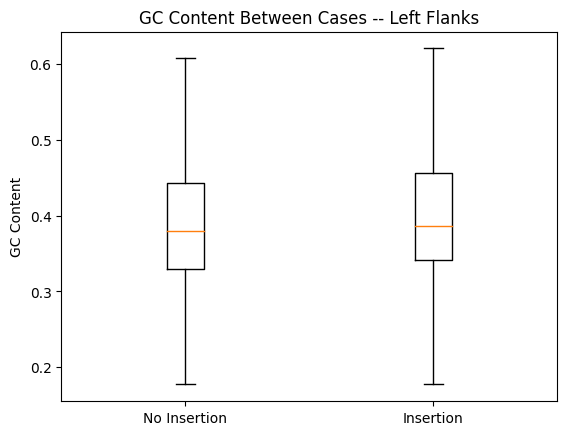

In [ ]:
boxPlotterGC('agroRight.csv', "Right")
boxPlotterGC('agroLeft.csv', "Left")